# ML Project

## Load Data

In [255]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/hamokhan67/Models/main/ML_data')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Split Data in X and Y

In [18]:
x = df.drop(columns=['logS'])
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [24]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

## Data Spliting

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 100)

In [31]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [33]:
y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

## Model Building

### Linear Regression Model

#### Training the Model

In [138]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [140]:
lr.fit(x_train, y_train)

LinearRegression()

#### Applying the Model to make predictions

In [143]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [145]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

#### Testing Model Performance

In [148]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mean = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mean = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [150]:
print('LR MSR (Train)',lr_train_mean)
print('LR R2 (Train)',lr_train_r2)

print('LR MSR (Test)',lr_test_mean)
print('LR R2 (Test)',lr_test_r2)

LR MSR (Train) 1.007536295109369
LR R2 (Train) 0.7645051774663391
LR MSR (Test) 1.0206953660861033
LR R2 (Test) 0.7891616188563282


In [152]:
Model_Result_LR = pd.DataFrame(['Linear Ragression', lr_train_mean, lr_train_r2, lr_test_mean, lr_test_r2]).T
Model_Result_LR.columns = ['Method','Traning MSE','Traning R2','Test MSE','Test R2']

In [154]:
Model_Result_LR

,Method,Traning MSE,Traning R2,Test MSE,Test R2
0,Linear Ragression,1.007536,0.764505,1.020695,0.789162


### Random Forest Model

#### Traning the Model

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Applying the Model to make predinctions

In [103]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

#### Testing the Model

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mean = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mean = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [107]:
print('RF MSR (Train)',rf_train_mean)
print('RF R2 (Train)',rf_train_r2)

print('RF MSR (Test)',rf_test_mean)
print('Rf R2 (Test)',rf_test_r2)

RF MSR (Train) 1.028227802112806
RF R2 (Train) 0.7596688824431413
RF MSR (Test) 1.407688264904896
Rf R2 (Test) 0.7092230211002489


In [113]:
Model_Result_RF = pd.DataFrame(['Random Forest', rf_train_mean, rf_train_r2, rf_test_mean, rf_test_r2]).T
Model_Result_RF.columns = ['Method','Traning MSE','Traning R2','Test MSE','Test R2']

In [111]:
Model_Result_RF

,Method,Traning MSE,Traning R2,Test MSE,Test R2
0,Random Forest,1.007536,0.764505,1.020695,0.789162


## Model Result

In [172]:
Model_Results = pd.concat([Model_Result_LR,Model_Result_RF],axis = 0)
Model_Results = Model_Results.reset_index(drop=True)

In [174]:
Model_Results

,Method,Traning MSE,Traning R2,Test MSE,Test R2
0,Linear Ragression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data visualization of prediction result

Text(0.5, 0, 'Real logs')

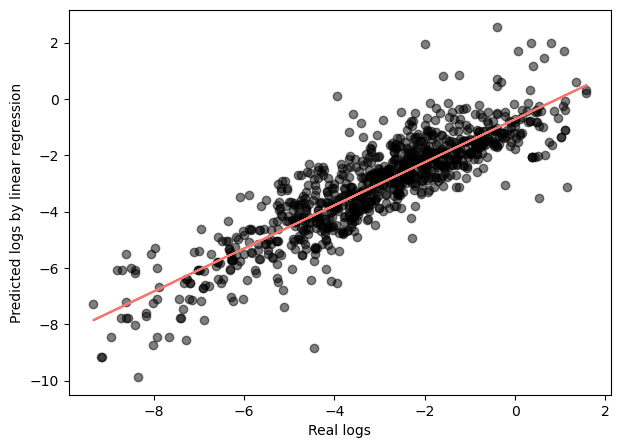

In [241]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[7,5])
plt.scatter(x=y_train, y=y_lr_train_pred, alpha = 0.5, c='k')

z = np.polyfit(y_train,y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted logs by linear regression')
plt.xlabel('Real logs')

Text(0.5, 0, 'Real logs')

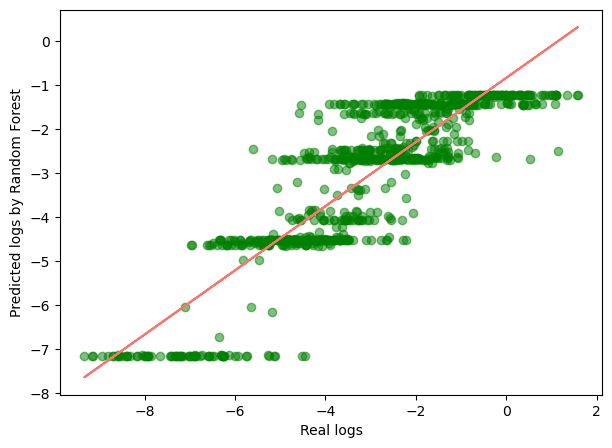

In [245]:
plt.figure(figsize=[7,5])
plt.scatter(x=y_train, y=y_rf_train_pred, alpha = 0.5, c='g')

z = np.polyfit(y_train,y_rf_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted logs by Random Forest')
plt.xlabel('Real logs')